In [1]:
import sys
sys.path.append('..')
from dnn import DNN
from dbn import DBN
from load_data import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

# Load data

In [2]:
binary_alpha = lire_alpha_digits(['A', 'E', 'X', '4'])

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

# Hyperparameters

In [4]:
epochs = 3000
batch_size = 512
learning_rate = 1e-3
patience = 10

nb_layers = 3
neurons = [256, 256, 256]

# Alpha Digits

In [5]:
dbn_alpha = DBN(X=binary_alpha, L=nb_layers, qs=neurons, use_adam=True)

In [6]:
dbn_alpha.train_DBN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [01:48<00:00, 36.29s/rbm, total_loss=0.0461]


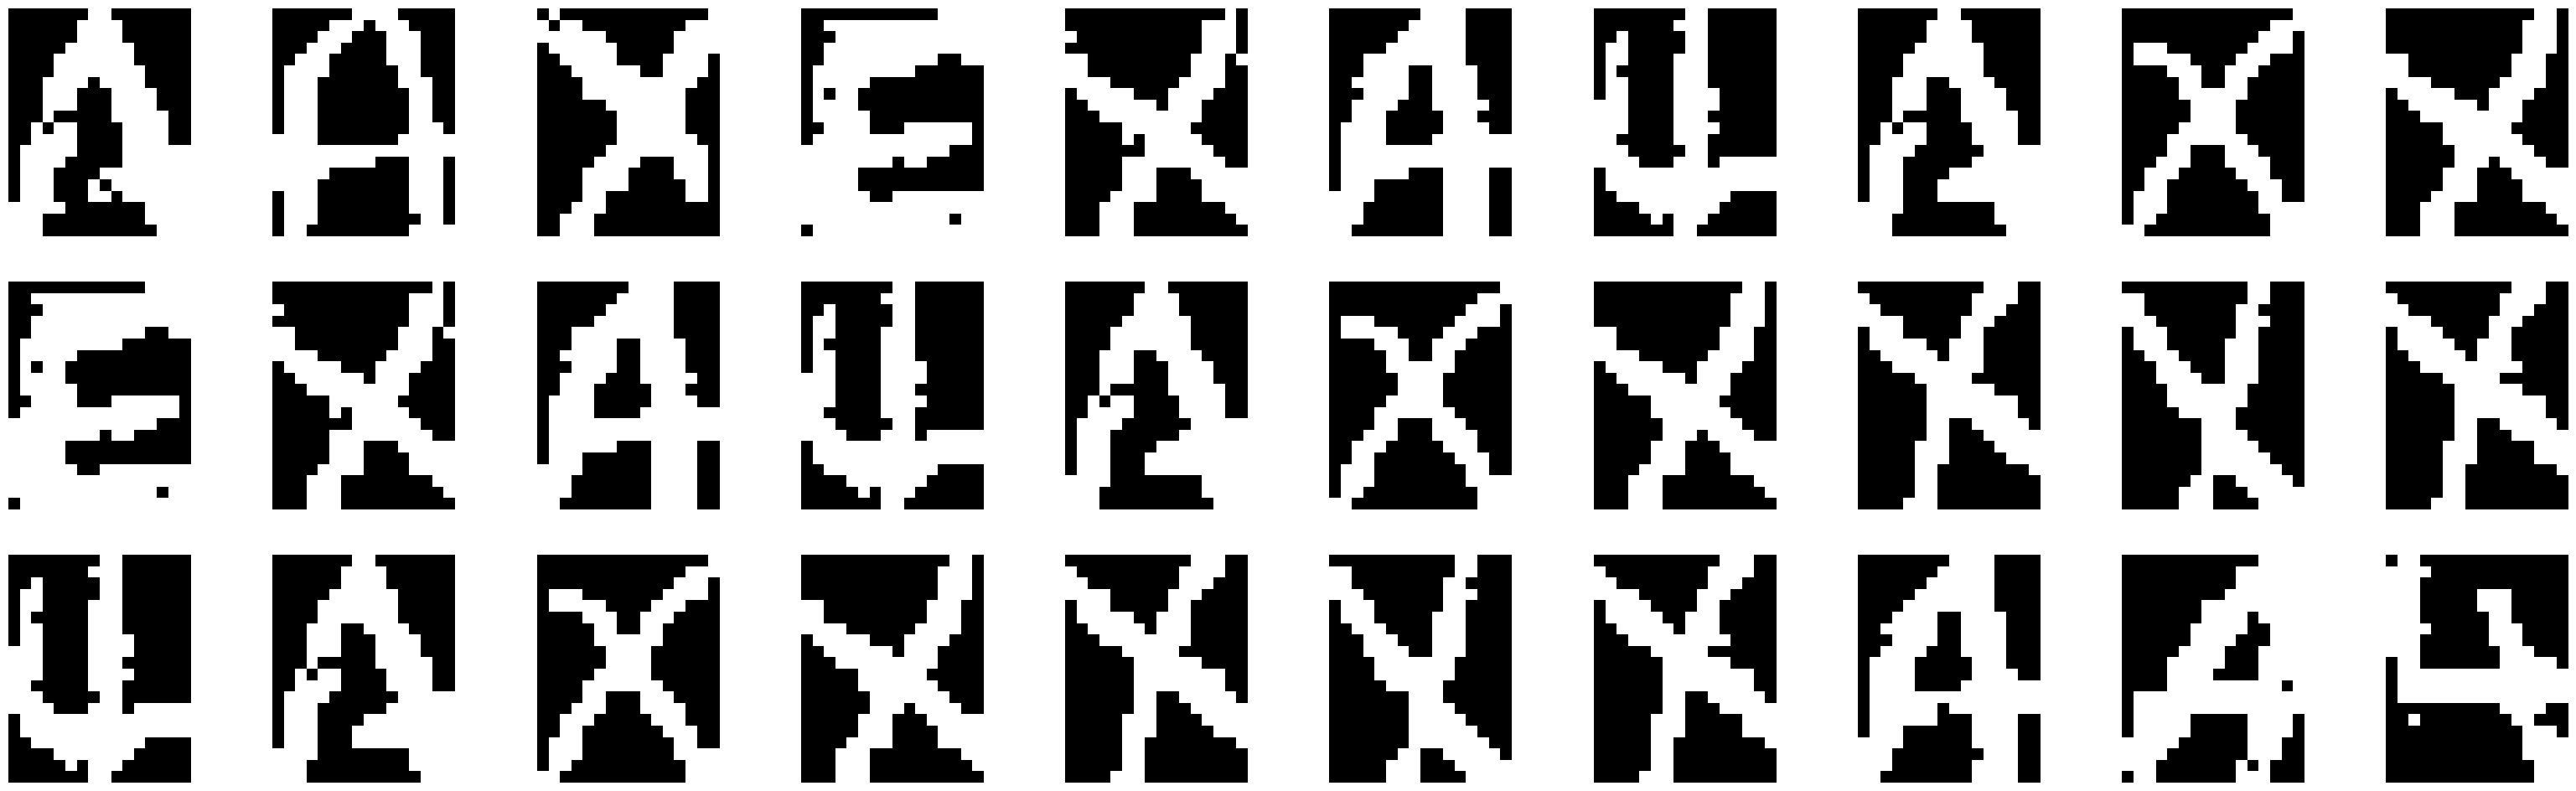

In [7]:
alpha_gen = dbn_alpha.generer_image_DBN(num_samples=30, gibbs_steps=1000, image_size=(20, 16))

# MNIST

### No pretrain - SGD

In [8]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)

Epoch 0:: loss: 2.0482, val_loss: 1.2055 ; accuracy: 31.66%, val_accuracy: 58.81%
Epoch 20:: loss: 0.1599, val_loss: 0.1673 ; accuracy: 95.25%, val_accuracy: 94.93%
Epoch 40:: loss: 0.082, val_loss: 0.1114 ; accuracy: 97.63%, val_accuracy: 96.58%
Epoch 60:: loss: 0.0379, val_loss: 0.0947 ; accuracy: 99.05%, val_accuracy: 97.08%
Epoch 80:: loss: 0.0172, val_loss: 0.095 ; accuracy: 99.69%, val_accuracy: 97.16%
##### Patience triggered at epoch 94! #####
Epoch 94:: loss: 0.0098, val_loss: 0.0962 ; accuracy: 99.9%, val_accuracy: 97.41%


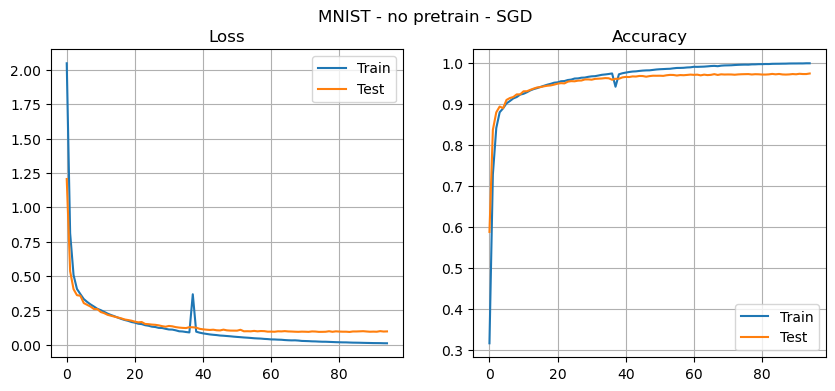

In [9]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=20,
    suptitle='MNIST - no pretrain - SGD')

### No pretrain - Adam

In [10]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)

Epoch 0:: loss: 1.2034, val_loss: 0.416 ; accuracy: 67.34%, val_accuracy: 88.98%
Epoch 20:: loss: 0.0157, val_loss: 0.0907 ; accuracy: 99.67%, val_accuracy: 97.36%
##### Patience triggered at epoch 29! #####
Epoch 29:: loss: 0.0026, val_loss: 0.101 ; accuracy: 99.99%, val_accuracy: 97.53%


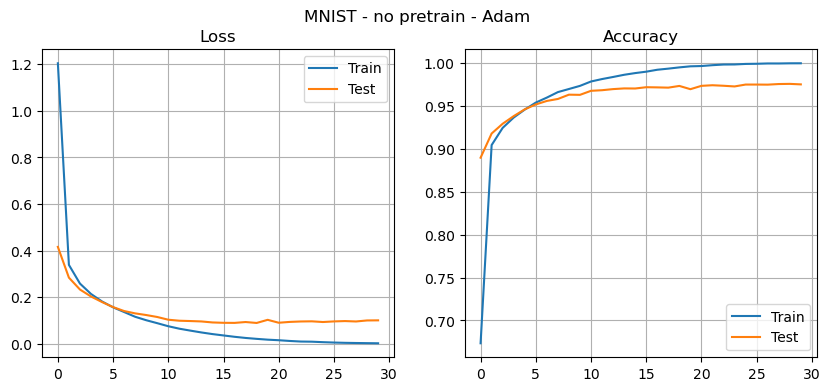

In [11]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=20,
    suptitle='MNIST - no pretrain - Adam')

### Pretrain - SGD

In [12]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [14:03<00:00, 281.17s/rbm, total_loss=0.155]


Epoch 0:: loss: 0.5798, val_loss: 0.3101 ; accuracy: 86.62%, val_accuracy: 92.41%
Epoch 20:: loss: 0.1073, val_loss: 0.1131 ; accuracy: 96.92%, val_accuracy: 96.71%
Epoch 40:: loss: 0.0734, val_loss: 0.0924 ; accuracy: 97.96%, val_accuracy: 97.13%
Epoch 60:: loss: 0.0547, val_loss: 0.0837 ; accuracy: 98.53%, val_accuracy: 97.36%
Epoch 80:: loss: 0.0424, val_loss: 0.0786 ; accuracy: 98.96%, val_accuracy: 97.46%
Epoch 100:: loss: 0.0336, val_loss: 0.0755 ; accuracy: 99.19%, val_accuracy: 97.54%
Epoch 120:: loss: 0.027, val_loss: 0.0734 ; accuracy: 99.41%, val_accuracy: 97.65%
Epoch 140:: loss: 0.022, val_loss: 0.0722 ; accuracy: 99.58%, val_accuracy: 97.66%
Epoch 160:: loss: 0.0181, val_loss: 0.0713 ; accuracy: 99.68%, val_accuracy: 97.67%
##### Patience triggered at epoch 172! #####
Epoch 172:: loss: 0.0162, val_loss: 0.0713 ; accuracy: 99.74%, val_accuracy: 97.7%


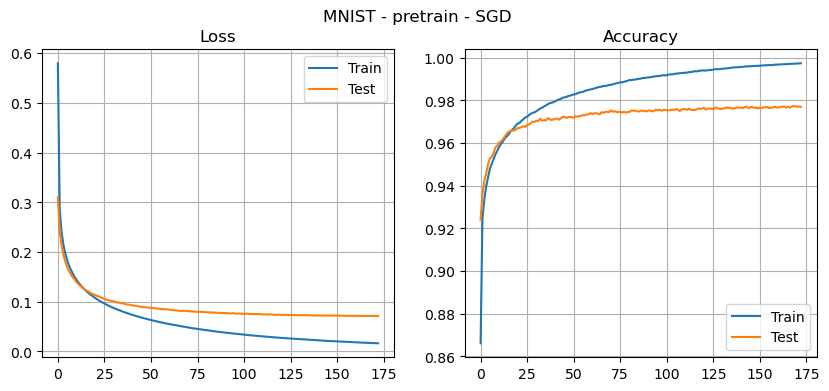

In [13]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=20,
    suptitle='MNIST - pretrain - SGD')

### Adam

In [5]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [14:02<00:00, 280.68s/rbm, total_loss=0.188]


Epoch 0:: loss: 0.9442, val_loss: 0.3462 ; accuracy: 75.99%, val_accuracy: 91.64%
Epoch 20:: loss: 0.007, val_loss: 0.0693 ; accuracy: 99.93%, val_accuracy: 97.84%
##### Patience triggered at epoch 28! #####
Epoch 28:: loss: 0.0019, val_loss: 0.0747 ; accuracy: 100.0%, val_accuracy: 97.86%


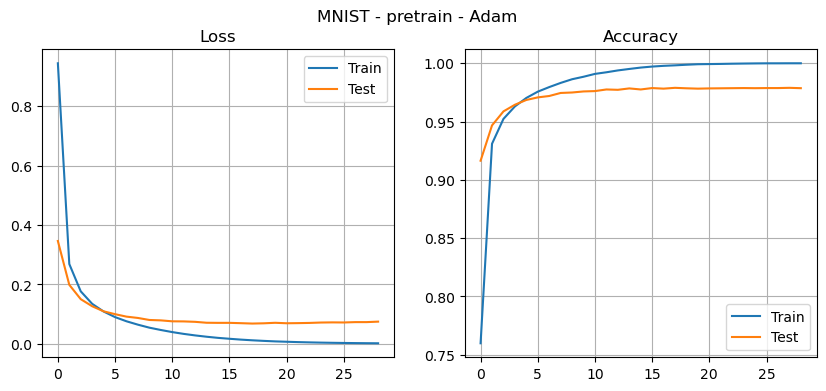

In [6]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=20,
    suptitle='MNIST - pretrain - Adam')